In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
plt.style.use(['classic'])

In [2]:
# Read in Revenue Files
file_2010 = "../../datasets/subsets/revenue/rev_2010.csv"

rev_2010 = pd.read_csv(file_2010)
rev_2010 = rev_2010.set_index(['STNAME'])
rev_2010

,2010_R1A,2010_R1B,2010_R1C,2010_R1D,2010_R1E,2010_R1F,2010_R1G,2010_R1H,2010_R1I,2010_R1J,...,2010_R1L,2010_R1M,2010_R1N,2010_R2,2010_R3,2010_R4A,2010_R4B,2010_R4C,2010_R4D,2010_R5
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,NaN,NaN,1.066022e+09,5.108787e+08,4089031.0,4.474970e+05,NaN,68041.0,24867476.0,131231168,...,327971818,1211133.0,NaN,26720185.0,3.800153e+09,19420093,1124843535,332455.0,23419758.0,4.795153e+08
alaska,NaN,NaN,2.648989e+08,1.764618e+08,128736.0,1.974290e+05,NaN,NaN,8362269.0,12385838,...,34323746,NaN,NaN,NaN,1.461906e+09,39328351,200116975,3880492.0,126403204.0,NaN
arizona,3.236621e+09,NaN,NaN,3.925100e+07,623204.0,2.326416e+07,231030.0,559826.0,27181631.0,112334694,...,505073847,713490.0,7425288.0,244178881.0,3.896117e+09,24003209,1692185717,1282525.0,175826078.0,5.172785e+08
arkansas,1.404473e+09,2.326573e+06,NaN,3.566662e+06,8232474.0,4.510065e+06,72620.0,548162.0,23411699.0,55612046,...,76847733,13378.0,249293.0,2442736.0,2.686231e+09,27293872,777093454,NaN,15071643.0,2.589943e+08
california,1.637982e+10,6.926428e+08,1.684000e+05,NaN,347461.0,2.891134e+08,19114777.0,38973491.0,422961228.0,457132827,...,2559558982,NaN,NaN,NaN,3.474325e+10,449367225,8146441881,26262699.0,233174056.0,1.150345e+10
colorado,3.453889e+09,5.438320e+07,NaN,NaN,61940236.0,5.344187e+06,5770364.0,152484.0,29338736.0,97073695,...,388426476,3143325.0,2992850.0,15970646.0,3.860026e+09,71842282,648824156,NaN,9696761.0,6.005297e+08
connecticut,NaN,NaN,5.410541e+09,NaN,4408494.0,1.917835e+08,NaN,11734362.0,122505.0,114355944,...,46951515,NaN,672931.0,NaN,3.463790e+09,38476754,802970022,NaN,13198617.0,6.067737e+08
delaware,4.397928e+08,NaN,NaN,NaN,NaN,5.660196e+07,NaN,NaN,4877064.0,16385131,...,57797489,NaN,NaN,NaN,1.046317e+09,7640037,208423150,NaN,2141189.0,1.792741e+08
district of columbia,NaN,NaN,6.002852e+08,9.004279e+08,819877.0,NaN,117985.0,NaN,132472.0,1815826,...,52331835,406.0,1615963.0,NaN,NaN,2842846,152663303,NaN,696218.0,3.667352e+06


In [3]:
# States with the biggest revenue
(rev_2010.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california      75.961783
new york        58.042497
texas           54.020614
illinois        32.018250
pennsylvania    28.616474
dtype: float64

In [4]:
# Begin creating a summary dataframe aggregating different revenue sources in main categories 

# Start with total revenue
summary_2010 = pd.DataFrame(rev_2010.sum(axis=1)/1000000000, columns=['total_rev'])
summary_2010.head()

,total_rev
STNAME,
alabama,7.719722
alaska,2.338413
arizona,10.611062
arkansas,5.424453
california,75.961783


In [5]:
# Aggregate Local Revenue Sources and add that to Summary Dataframe
summary_2010['local_rev'] = rev_2010.iloc[:,0:14].sum(axis=1)/1000000000
summary_2010.head()

,total_rev,local_rev
STNAME,,
alabama,7.719722,2.245317
alaska,2.338413,0.506777
arizona,10.611062,4.060190
arkansas,5.424453,1.657327
california,75.961783,20.859834


In [6]:
# Aggregate State Revenue Sources and add that to Summary Dataframe
summary_2010['state_rev'] = rev_2010.iloc[:,15:16].sum(axis=1)/1000000000
summary_2010.head(5)

,total_rev,local_rev,state_rev
STNAME,,,
alabama,7.719722,2.245317,3.800153
alaska,2.338413,0.506777,1.461906
arizona,10.611062,4.060190,3.896117
arkansas,5.424453,1.657327,2.686231
california,75.961783,20.859834,34.743249


In [7]:
# Aggregate Federal Revenue Sources and add that to Summary Dataframe
summary_2010['federal_rev'] = rev_2010.iloc[:,16:20].sum(axis=1)/1000000000
summary_2010.head(5)

,total_rev,local_rev,state_rev,federal_rev
STNAME,,,,
alabama,7.719722,2.245317,3.800153,1.168016
alaska,2.338413,0.506777,1.461906,0.369729
arizona,10.611062,4.060190,3.896117,1.893298
arkansas,5.424453,1.657327,2.686231,0.819459
california,75.961783,20.859834,34.743249,8.855246


In [8]:
# Aggregate Ancillary Revenue Sources and add that to Summary Dataframe
summary_2010['other_rev'] = (rev_2010.iloc[:,14:15].sum(axis=1) + rev_2010.iloc[:,20:21].sum(axis=1))/1000000000
summary_2010.head(5)

,total_rev,local_rev,state_rev,federal_rev,other_rev
STNAME,,,,,
alabama,7.719722,2.245317,3.800153,1.168016,0.506236
alaska,2.338413,0.506777,1.461906,0.369729,0.000000
arizona,10.611062,4.060190,3.896117,1.893298,0.761457
arkansas,5.424453,1.657327,2.686231,0.819459,0.261437
california,75.961783,20.859834,34.743249,8.855246,11.503454


In [9]:
# Create a similar summary DataFrame analyzing funding sources as a % of total

summary_pct = pd.DataFrame(summary_2010['local_rev'] / summary_2010['total_rev'] *100, columns = ['local_rev_%'])
summary_pct['state_rev_%'] = summary_2010['state_rev'] / summary_2010['total_rev'] *100
summary_pct['federal_rev_%'] = summary_2010['federal_rev'] / summary_2010['total_rev'] *100
summary_pct['other_rev_%'] = summary_2010['other_rev'] / summary_2010['total_rev'] *100
summary_pct.head(5)

,local_rev_%,state_rev_%,federal_rev_%,other_rev_%
STNAME,,,,
alabama,29.085465,49.226559,15.130285,6.557691
alaska,21.671856,62.517034,15.811110,0.000000
arizona,38.263746,36.717505,17.842677,7.176072
arkansas,30.552877,49.520765,15.106756,4.819602
california,27.460959,45.737800,11.657501,15.143739


In [10]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2010.csv"

success_2010 = pd.read_csv(dropout_path)
success_2010.head(5)

,STNAME,2010_DRP912,2010_DRP9,2010_DRP10,2010_DRP11,2010_DRP12,2010_DRPAM,2010_DRPAS,2010_DRPHI,2010_DRPBL,2010_DRPWH
0,alabama,1.799999,1.400000,2.000000,2.099998,1.799999,1.299999,1.400000,0.900000,2.000000,1.599999
1,alaska,6.899998,4.000000,5.500000,9.299995,8.699997,11.599998,3.500000,6.099998,6.399998,5.099998
2,arizona,7.799999,5.099998,5.699997,7.000000,13.599998,14.599998,4.899998,8.099998,8.799995,6.799999
3,arkansas,3.599998,1.900000,3.199999,4.399998,5.299999,4.899998,1.400000,4.099998,5.000000,3.099998
4,california,4.599998,2.599998,3.099998,4.199997,8.899994,6.500000,1.799999,5.799999,8.399994,2.799999


In [11]:
summary_pct['dropout_rate'] = ''

for i in range(len(success_2010)):
    summary_pct['dropout_rate'][i] = success_2010['2010_DRP912'][i].astype(float)
    
summary_pct.head()

C:\Users\memgo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,local_rev_%,state_rev_%,federal_rev_%,other_rev_%,dropout_rate
STNAME,,,,,
alabama,29.085465,49.226559,15.130285,6.557691,1.8
alaska,21.671856,62.517034,15.811110,0.000000,6.9
arizona,38.263746,36.717505,17.842677,7.176072,7.8
arkansas,30.552877,49.520765,15.106756,4.819602,3.6
california,27.460959,45.737800,11.657501,15.143739,4.6


In [12]:
summary_pct.sort_values(by=['dropout_rate'], ascending = False).head()

,local_rev_%,state_rev_%,federal_rev_%,other_rev_%,dropout_rate
STNAME,,,,,
arizona,38.263746,36.717505,17.842677,7.176072,7.8
mississippi,31.182829,47.246518,21.191115,0.379538,7.4
district of columbia,90.729958,0.000000,9.057390,0.212651,7
alaska,21.671856,62.517034,15.811110,0.000000,6.9
new mexico,14.380167,58.790631,19.458794,7.370408,6.9


In [13]:
summary_2010['dropout_rate'] = ''

for i in range(len(success_2010)):
    summary_2010['dropout_rate'][i] = success_2010['2010_DRP912'][i].astype(float)
    
summary_2010.head()
#summary_2010.drop(labels='Dropout Rate', axis=1).head()

C:\Users\memgo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,total_rev,local_rev,state_rev,federal_rev,other_rev,dropout_rate
STNAME,,,,,,
alabama,7.719722,2.245317,3.800153,1.168016,0.506236,1.8
alaska,2.338413,0.506777,1.461906,0.369729,0.000000,6.9
arizona,10.611062,4.060190,3.896117,1.893298,0.761457,7.8
arkansas,5.424453,1.657327,2.686231,0.819459,0.261437,3.6
california,75.961783,20.859834,34.743249,8.855246,11.503454,4.6


In [14]:
# Drop NAs in case these exist; confirm dropout rates are stored as floats
summary_2010 = summary_2010[summary_2010['dropout_rate'].notna()]
summary_2010['dropout_rate'] = summary_2010['dropout_rate'].astype(float)
summary_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_rev     51 non-null     float64
 1   local_rev     51 non-null     float64
 2   state_rev     51 non-null     float64
 3   federal_rev   51 non-null     float64
 4   other_rev     51 non-null     float64
 5   dropout_rate  51 non-null     float64
dtypes: float64(6)
memory usage: 2.8+ KB


In [15]:
# Create a function for scatter plots:
def scatter(x_axis, y_axis, x_label, y_label):
    plt.scatter(x_axis, y_axis)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Relationship between {x_label} and {y_label}')
    
    right_xlim = x_axis.max()
    plt.xlim(left = 0, right = right_xlim)
    plt.grid()

In [16]:
# Create a function for linear regression:
def regression(x_axis,y_axis, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")
    
    medians = (x_axis.median(), y_axis.median())
    plt.annotate(line_eq, medians,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Relationship between {x_label} and {y_label}')
    print(f"The r-squared is: {rvalue**2}")
    
    plt.show()

In [17]:
# Create a function to determine potential outliers:

def outliers(x_axis):
    quartiles = x_axis.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    #outlier = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
    outlier

The r-squared is: 0.012391414043858887


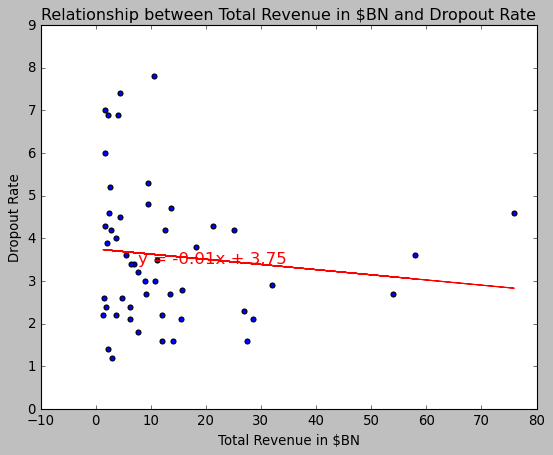

In [18]:
# Total Revenue and Dropout Rate
x_axis = summary_2010['total_rev'].astype(float)
y_axis = summary_2010['dropout_rate'].astype(float)

x_label = ('Total Revenue in $BN')
y_label = ('Dropout Rate')

regression(x_axis,y_axis, x_label, y_label)